In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:xlabel='ChestPainType'>

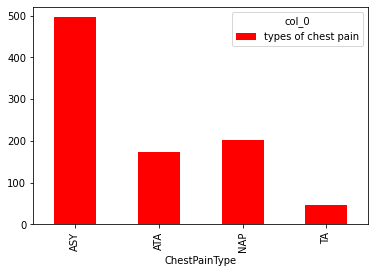

In [8]:
pd.crosstab(index = df['ChestPainType'],columns = 'types of chest pain').plot(kind = 'bar',color = 'red')

<AxesSubplot:xlabel='RestingECG'>

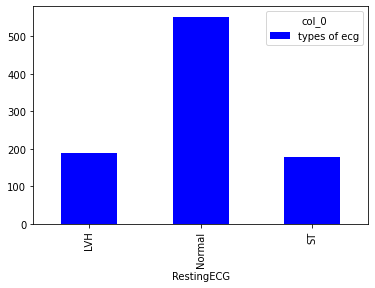

In [9]:
pd.crosstab(index = df['RestingECG'],columns = 'types of ecg').plot(kind = 'bar',color = 'blue')

<AxesSubplot:xlabel='ExerciseAngina'>

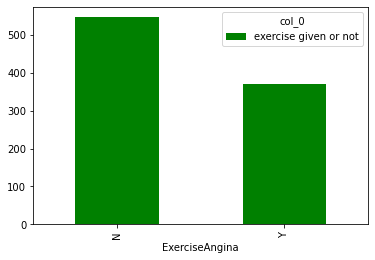

In [10]:
pd.crosstab(index = df['ExerciseAngina'],columns = 'exercise given or not').plot(kind = 'bar',color = 'green')

<AxesSubplot:xlabel='ST_Slope'>

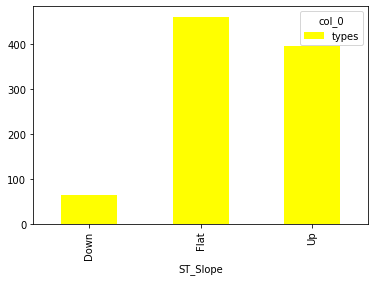

In [11]:
pd.crosstab(index = df['ST_Slope'],columns = 'types').plot(kind = 'bar',color = 'yellow')

<AxesSubplot:ylabel='Density'>

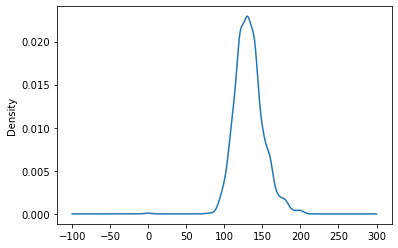

In [12]:
df.RestingBP.plot.kde()

<AxesSubplot:ylabel='Density'>

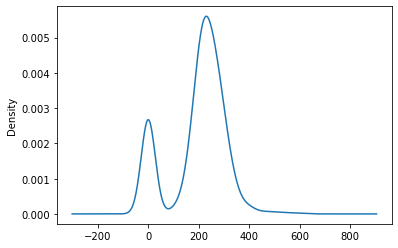

In [13]:
df.Cholesterol.plot.kde()

<AxesSubplot:ylabel='Density'>

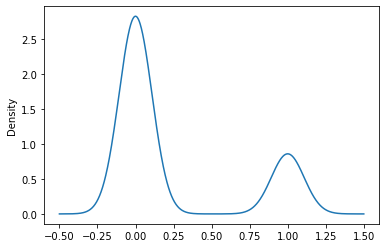

In [14]:
df.FastingBS.plot.kde()

<AxesSubplot:ylabel='Density'>

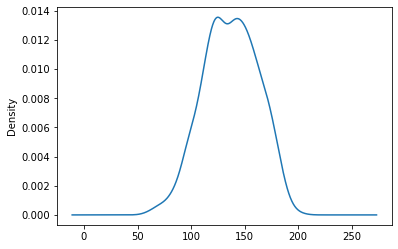

In [15]:
df.MaxHR.plot.kde()

<AxesSubplot:ylabel='Density'>

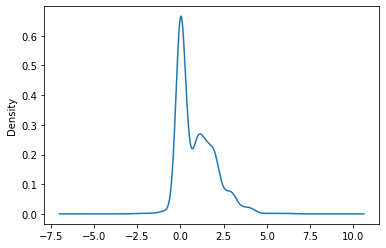

In [16]:
df.Oldpeak.plot.kde()

In [17]:
df[df.Cholesterol>df.Cholesterol.mean()+3*df.Cholesterol.std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [18]:
df1 = df[df.Cholesterol<=df.Cholesterol.mean()+3*df.Cholesterol.std()]

In [19]:
df1.shape

(915, 12)

In [29]:
df1[df1.RestingBP>df1.RestingBP.mean()+3*df1.RestingBP.std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [30]:
df2 = df1[df1.RestingBP<=df1.RestingBP.mean()+3*df1.RestingBP.std()]

In [31]:
df2.shape

(908, 12)

In [32]:
df2[df2.Oldpeak>df2.Oldpeak.mean()+3*df2.Oldpeak.std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [33]:
df3 = df2[df2.Oldpeak<=df2.Oldpeak.mean()+3*df2.Oldpeak.std()]

In [34]:
df3.shape

(902, 12)

In [35]:
df3[df3.FastingBS>df3.FastingBS.mean()+3*df3.FastingBS.std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [36]:
df4 = df3

In [37]:
df4.shape

(902, 12)

In [38]:
df5 = pd.get_dummies(df4,drop_first= True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [40]:
X = df5.drop('HeartDisease',axis = 1)
y = df5.HeartDisease

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5].reshape(15,5)

array([[-1.42896269,  0.46089071,  0.85238015, -0.55087949,  1.38191324],
       [-0.84676261,  0.51485643,  2.06757196, -0.53547478, -0.22914788],
       [ 0.80934904, -0.49062742, -0.82065181, -1.00221976,  1.13805334],
       [-0.47545956,  1.5925728 , -0.16132855, -0.55087949,  0.75291107],
       [ 0.14079864, -1.94228905, -0.4836591 ,  1.86750159, -0.22914788],
       [ 0.80934904, -0.49062742, -0.82065181,  0.99778516, -0.87869344],
       [-1.74679706, -0.10495034,  0.79657967, -0.55087949, -1.5272218 ],
       [-0.84676261,  0.51485643,  2.06757196, -0.53547478, -0.22914788],
       [-1.23556086,  2.03820649, -0.82065181, -1.00221976,  1.13805334],
       [-0.58140435,  0.3477225 ,  0.15487417, -0.55087949, -1.13409545],
       [ 0.63457927, -1.94228905, -0.4836591 , -0.53547478, -0.22914788],
       [ 0.80934904, -0.49062742,  1.21854359,  0.99778516, -0.87869344],
       [ 0.05426441,  1.02673175, -0.02182735, -0.55087949, -0.58371855],
       [-0.84676261,  0.51485643, -0.4

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2)

In [47]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.856353591160221

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.7513812154696132

In [49]:
score_svm = cross_val_score(SVC(),X,y,cv = 5)
score_dtc = cross_val_score(DecisionTreeClassifier(),X,y,cv=5)

In [50]:
score_svm

array([0.62983425, 0.79558011, 0.68888889, 0.71666667, 0.61666667])

In [51]:
score_svm.mean()

0.6895273173726213

In [52]:
score_dtc

array([0.7679558 , 0.79558011, 0.77222222, 0.66111111, 0.61666667])

In [53]:
score_dtc.mean()

0.722707182320442

In [54]:
bag_model = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=None)
bag_model.fit(X_train,y_train)
bag_model.oob_score_

0.8668515950069348

In [57]:
bag_model = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=None)
score_svm_bag = cross_val_score(bag_model,X,y,cv =5)
score_svm_bag.mean()

0.6817434008594231

In [58]:
bag_model_dtc = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=None)
bag_model_dtc.fit(X_train,y_train)
bag_model_dtc.oob_score_

0.8613037447988904

In [59]:
bag_model_dtc = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=None)
score_dtc_bag = cross_val_score(bag_model,X,y,cv =5)
score_dtc_bag.mean()

0.6839717618170658